Initial Shape: (891, 12)

Missing Values Before Cleaning:

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


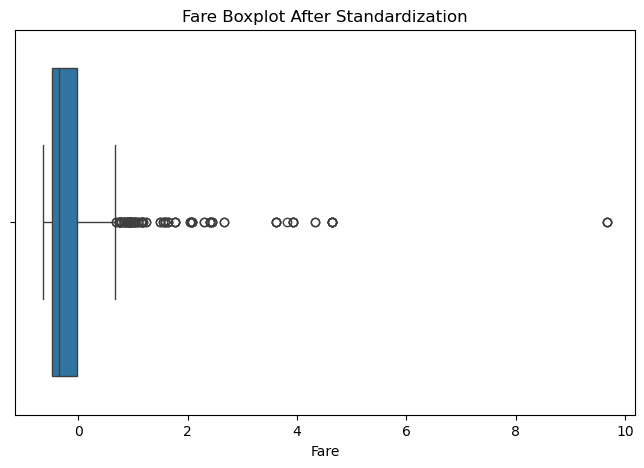


Final Shape After Cleaning: (775, 12)

Missing Values After Cleaning:

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked_Q     0
Embarked_S     0
dtype: int64

Fare Statistics:

count    775.000000
mean      -0.289579
std        0.273391
min       -0.648422
25%       -0.489442
50%       -0.386671
75%       -0.124920
max        0.660333
Name: Fare, dtype: float64

First 5 Rows After Cleaning:

   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                       Braund, Mr. Owen Harris    0 -0.565736      1      0   
2                        Heikkinen, Miss. Laina    1 -0.258337      0      0   
3  Futrelle, Mrs.

In [1]:
# ==========================================
# 1️⃣ Import Required Libraries
# ==========================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler


# ==========================================
# 2️⃣ Load Dataset
# ==========================================

df = pd.read_csv("Titanic-Dataset.csv")

print("Initial Shape:", df.shape)
print("\nMissing Values Before Cleaning:\n")
print(df.isnull().sum())


# ==========================================
# 3️⃣ Handle Missing Values (Best Practice)
# ==========================================

# Fill Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop Cabin column (too many missing values)
df = df.drop(columns=['Cabin'])


# ==========================================
# 4️⃣ Convert Categorical to Numerical
# ==========================================

# Convert Sex (Label Encoding)
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# One Hot Encoding for Embarked
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


# ==========================================
# 5️⃣ Feature Scaling (Standardization)
# ==========================================

scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


# ==========================================
# 6️⃣ Outlier Detection (Boxplot)
# ==========================================

plt.figure(figsize=(8,5))
sns.boxplot(x=df['Fare'])
plt.title("Fare Boxplot After Standardization")
plt.show()


# ==========================================
# 7️⃣ Remove Outliers (IQR Method)
# ==========================================

Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]


# ==========================================
# 8️⃣ Final Output Check
# ==========================================

print("\nFinal Shape After Cleaning:", df.shape)

print("\nMissing Values After Cleaning:\n")
print(df.isnull().sum())

print("\nFare Statistics:\n")
print(df['Fare'].describe())

print("\nFirst 5 Rows After Cleaning:\n")
print(df.head())


In [2]:
# Re-scale after outlier removal
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


In [3]:
print(df['Fare'].describe())


count    7.750000e+02
mean    -9.168293e-17
std      1.000646e+00
min     -1.313411e+00
25%     -7.315244e-01
50%     -3.553671e-01
75%      6.026763e-01
max      3.476807e+00
Name: Fare, dtype: float64
